In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [13]:
samples = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
   
    for line in reader:
        if(line):
            samples.append(line)
print(samples[12])
samples.pop(0)        
print("Samples total",len(samples))
print("")
print("center image name",samples[0])
print("")
print("angle",samples[0][3])
print("")
name = './data/IMG/'+samples[0][0].split('/')[-1]
print("ip file name",name)
print("")
img = cv2.imread(name)
img_shape = img.shape
print("ip img shape",img_shape)
print("")
img = cv2.resize(img, (32, 32))
img_shape = img.shape
print("resize img shape",img_shape)
print("")


images = []
angles = []

['IMG/center_2016_12_01_13_31_13_890.jpg', ' IMG/left_2016_12_01_13_31_13_890.jpg', ' IMG/right_2016_12_01_13_31_13_890.jpg', ' 0', ' 0', ' 0', ' 1.31882']
Samples total 8090

center image name ['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829']

angle  0

ip file name ./data/IMG/center_2016_12_01_13_30_48_287.jpg

ip img shape (160, 320, 3)

resize img shape (32, 32, 3)



./data/IMG/center_2016_12_01_13_32_49_413.jpg
(160, 320, 3)
(100, 300, 3)


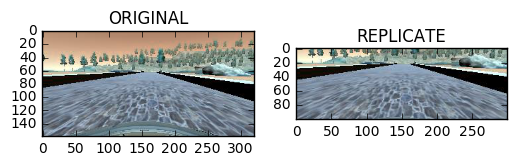

In [14]:

%matplotlib inline
item = samples.pop(110)

name = './data/IMG/'+item[0].split('/')[-1]
print(name)
image_test = cv2.imread(name)
print(image_test.shape)
#img_tosearch = cv2.resize(image_test, (200, 80))
#crop the images not resize
img_tosearch = image_test[40:140,10:310,:] 
plt.subplot(121),plt.imshow(image_test,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(img_tosearch,'gray'),plt.title('REPLICATE')
print(img_tosearch.shape)

In [15]:
sample_large = []
for sample in samples:
    #print(sample)
    if(sample):
        #print(sample[])
        if(abs(float(sample[3]))> 0.3):
            sample_large.append(sample) 

In [16]:
angle_orig = np.empty([0], dtype=np.float32)      
angle_large = np.empty([0], dtype=np.float32)     
print(len(samples))
samples.pop(0)
for sample in samples:
    #print(sample)
    if(sample):
        #print(sample[])
        angle_orig = np.append(angle_orig,float(sample[3]) )
        if(abs(float(sample[3]))> 0.3):
            angle_large = np.append(angle_large,float(sample[3]) )
            

8089


Total samples 8088
EOF


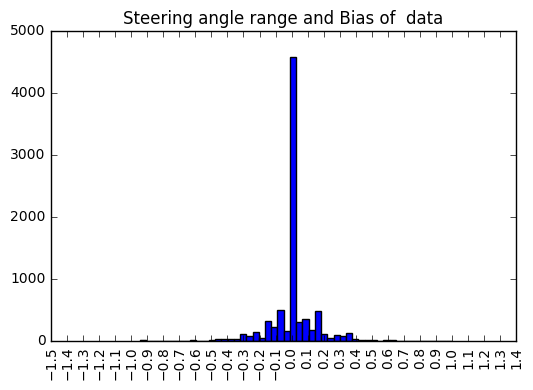

In [17]:
plt.hist(angle_orig,bins= 50)
plt.title("Steering angle range and Bias of  data")
plt.xticks(np.arange(-1.5,1.5,0.1),rotation='vertical')


print("Total samples", len(angle_orig))

print("EOF")#	

Total samples 452
EOF


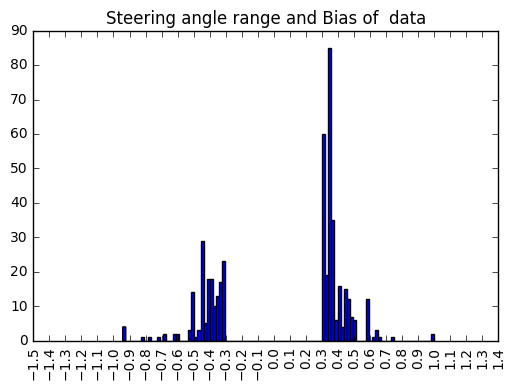

In [18]:
plt.hist(angle_large,bins= 100)
plt.title("Steering angle range and Bias of  data")
plt.xticks(np.arange(-1.5,1.5,0.1),rotation='vertical')


print("Total samples", len(angle_large))

print("EOF")#	

In [8]:

%matplotlib inline
import scipy.misc
#images = []
#angles = []
# record  is as follows
#center left right steering throttle brake speed 
record =[]
#fields=['name','angle']
strFolderSrc = './data/IMG/'
strFolderDst = './data/IMG/'
strFolder = 'IMG/'
with open('./data/driving_log.csv', 'a', newline='') as fileWrite:
    writer = csv.writer(fileWrite)
    #writer.writerow(fields)
    nameIndex = 0
    for batch_sample in sample_large:

        name = strFolderSrc+batch_sample[0].split('/')[-1]
        center_image = cv2.imread(name)
        center_angle = float(batch_sample[3])
        image1 = cv2.cvtColor(center_image,cv2.COLOR_BGR2YUV)
        name_just = batch_sample[0].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_center = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_center, image1)
        name_center = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        
        name = strFolderSrc+batch_sample[1].split('/')[-1]
        left_image = cv2.imread(name)
        image1 = cv2.cvtColor(left_image,cv2.COLOR_BGR2YUV)
        name_just = batch_sample[1].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_left = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_left, image1)
        name_left = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        
        name = strFolderSrc+batch_sample[2].split('/')[-1]
        rt_image = cv2.imread(name)
        image1 = cv2.cvtColor(rt_image,cv2.COLOR_BGR2YUV)
        name_just = batch_sample[2].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_right = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_right, image1)
        fields = [name_center,name_left,name_right,center_angle]
        name_right = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        print(fields)
        writer.writerow(fields)
        
        
        name = strFolderSrc+batch_sample[0].split('/')[-1]
        center_image = cv2.imread(name)
        center_angle = float(batch_sample[3])
        image1 = cv2.cvtColor(center_image,cv2.COLOR_BGR2HSV)
        name_just = batch_sample[0].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_center = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_center, image1)
        name_center = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        
        name = strFolderSrc+batch_sample[1].split('/')[-1]
        left_image = cv2.imread(name)
        image1 = cv2.cvtColor(left_image,cv2.COLOR_BGR2HSV)
        name_just = batch_sample[1].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_left = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_left, image1)
        name_left = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        
        
        name = strFolderSrc+batch_sample[2].split('/')[-1]
        rt_image = cv2.imread(name)
        image1 = cv2.cvtColor(rt_image,cv2.COLOR_BGR2HSV)
        name_just = batch_sample[2].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_right = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_right, image1)
        name_right = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        fields = [name_center,name_left,name_right,center_angle]
        
        print(fields)
        writer.writerow(fields)
        
        name = strFolderSrc+batch_sample[0].split('/')[-1]
        print(name)
        center_image = cv2.imread(name)
        h, w = center_image.shape[0], center_image.shape[1]
        [x1, x2] = np.random.choice(w, 2, replace=False)
        k = h / (x2 - x1)
        b = - k * x1   
        image1 = center_image
        for i in range(h):
            c = int((i - b) / k)
            image1[i, :c, :] = (center_image[i, :c, :] * .5).astype(np.int32)
        name_just = batch_sample[0].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_center = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_center, image1)
        name_center = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        
        name = strFolderSrc+batch_sample[1].split('/')[-1]
        #print(name)
        left_image = cv2.imread(name)
        h, w = left_image.shape[0], left_image.shape[1]
        [x1, x2] = np.random.choice(w, 2, replace=False)
        k = h / (x2 - x1)
        b = - k * x1   
        image1 = left_image
        for i in range(h):
            c = int((i - b) / k)
            image1[i, :c, :] = (left_image[i, :c, :] * .5).astype(np.int32)
        name_just = batch_sample[1].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_left = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_left, image1)
        name_left = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        
        name = strFolderSrc+batch_sample[2].split('/')[-1]
        print(name)
        rt_image = cv2.imread(name)
        h, w = rt_image.shape[0], rt_image.shape[1]
        [x1, x2] = np.random.choice(w, 2, replace=False)
        k = h / (x2 - x1)
        b = - k * x1   
        image1 = rt_image
        for i in range(h):
            c = int((i - b) / k)
            image1[i, :c, :] = (rt_image[i, :c, :] * .5).astype(np.int32)
        name_just = batch_sample[2].split('/')[-1]
        name_new = name_just.split('.jpg')
        nameIndex = nameIndex + 1
        name_rt = strFolderDst+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        scipy.misc.imsave(name_rt, image1)
        name_rt = strFolder+name_new[0]+'_New_'+str(nameIndex)+'.jpg'
        fields = [name_center,name_left,name_rt,center_angle]
        #print(fields,center_angle)
        writer.writerow(fields)
        #center_image = v2.imread(name)
            
            

['IMG/center_2016_12_01_13_32_43_761_New_1.jpg', 'IMG/left_2016_12_01_13_32_43_761_New_2.jpg', './data/IMG/right_2016_12_01_13_32_43_761_New_3.jpg', 0.3679529]
['IMG/center_2016_12_01_13_32_43_761_New_4.jpg', 'IMG/left_2016_12_01_13_32_43_761_New_5.jpg', 'IMG/right_2016_12_01_13_32_43_761_New_6.jpg', 0.3679529]
./data/IMG/center_2016_12_01_13_32_43_761.jpg
./data/IMG/right_2016_12_01_13_32_43_761.jpg
['IMG/center_2016_12_01_13_32_43_862_New_10.jpg', 'IMG/left_2016_12_01_13_32_43_862_New_11.jpg', './data/IMG/right_2016_12_01_13_32_43_862_New_12.jpg', 0.5784606]
['IMG/center_2016_12_01_13_32_43_862_New_13.jpg', 'IMG/left_2016_12_01_13_32_43_862_New_14.jpg', 'IMG/right_2016_12_01_13_32_43_862_New_15.jpg', 0.5784606]
./data/IMG/center_2016_12_01_13_32_43_862.jpg
./data/IMG/right_2016_12_01_13_32_43_862.jpg
['IMG/center_2016_12_01_13_32_43_963_New_19.jpg', 'IMG/left_2016_12_01_13_32_43_963_New_20.jpg', './data/IMG/right_2016_12_01_13_32_43_963_New_21.jpg', 0.5784606]
['IMG/center_2016_12_01

KeyboardInterrupt: 

In [9]:
angle = np.empty([0], dtype=np.float32)
record = []
with open('./data/driving_log_3.csv') as csvfile:
    reader = csv.reader(csvfile)
   
    for line in reader:
        record.append(line)
        
print(len(record))
record.pop(0)
count = 0
for sample in record[:]:
    #print(sample)
    if(sample):
        #print(sample[1])
        angle = np.append(angle,float(sample[3]) )
        if(abs(float(sample[3]))> 0.3):
            count+= 1

print(count)

9538
1849


In [10]:
print(len(angle))
print(angle[1])


9537
0.0


Total samples 9537
EOF


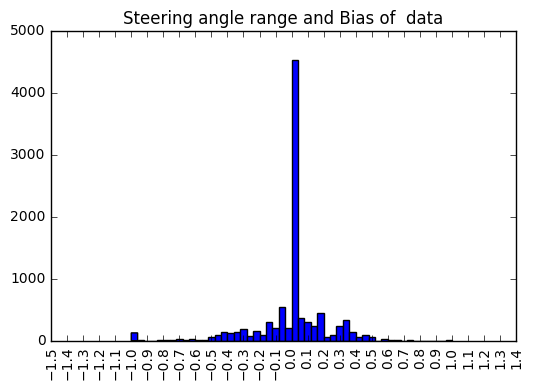

In [11]:

plt.hist(angle,bins= 50)
plt.title("Steering angle range and Bias of  data")
plt.xticks(np.arange(-1.5,1.5,0.1),rotation='vertical')



print("Total samples", len(angle))

print("EOF")#	

./data/sample/


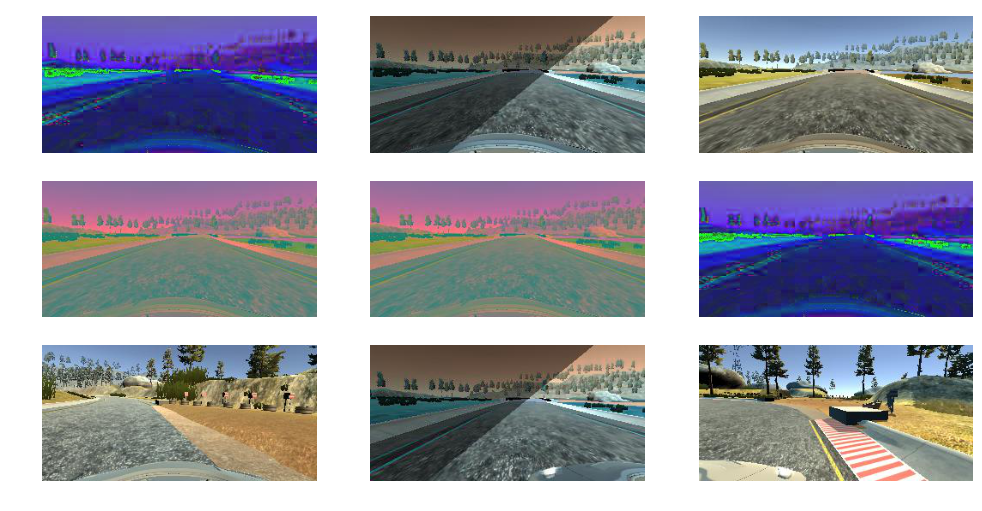

In [20]:
   # Visualizations will be shown inline
%matplotlib inline
from os import listdir
from os.path import isfile, join
sample_data_directory =  './data/'+'sample/'
print(sample_data_directory)

S = np.ones((9,160,320,3), dtype=np.uint8)

plt.rcParams['figure.figsize'] = (12, 6)

#onlyfiles = ['sample_data_directory/'+f for f in listdir('sample_data_directory') ]
#print(onlyfiles)
#imagesTogether = []	
#for f in onlyfiles:
for i in range(9):
   # i = i+1
    image = mpimg.imread(sample_data_directory + "sample%d.jpg" % i)
    S[i] = image
    plt.subplot(3, 3, i+1)
    plt.imshow(image, aspect='auto')
    plt.axis('off')                